¡Hola!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-analyst. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Hola, Rodrigo! Recuerda que para los ejercicio de análisis de datos es necesario desarrollar la introducción, objetivo y etapas de análisis. Esto es crucial para cualquier proyecto, ya que establece una guía clara sobre los pasos a seguir. Tener estos elementos bien definidos desde el principio nos permite trabajar de manera más organizada y eficiente. En un futuro lo podrías complementar con una tabla de contenido.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente trabajo con agregar los elementos de introducción y objetivos, Rodrigo! Esto ayuda bastante cuando hacemos análisis de datos
</div>

# Análisis de Datos de Ventas de Videojuegos

## Introducción

La industria de los videojuegos ha crecido exponencialmente en las últimas décadas, convirtiéndose en un componente fundamental del entretenimiento global. Con una gran variedad de plataformas y géneros, así como un flujo constante de lanzamientos, entender los factores que contribuyen al éxito de un videojuego es esencial para desarrolladores, empresas y analistas. Este proyecto se centra en el análisis de un conjunto de datos de videojuegos, con el objetivo de identificar patrones y tendencias que determinen las características de los juegos exitosos, así como el impacto de las reseñas de críticos y usuarios.



## Objetivo

El objetivo de este proyecto es analizar un conjunto de datos de videojuegos para:
1. Identificar las plataformas y géneros más populares y sus ventas asociadas.
2. Analizar la relación entre las calificaciones de críticos y usuarios y las ventas totales.
3. Investigar cómo el año de lanzamiento y el género influyen en el desempeño comercial de los videojuegos.
4. Proporcionar recomendaciones para futuras campañas de marketing basadas en los hallazgos del análisis.


In [2]:
import pandas as pd

# Cargar el dataset
file_path = '/datasets/games.csv'
games_df = pd.read_csv(file_path)

# Mostrar las primeras filas del DataFrame
print(games_df.head())

# Paso 2.1: Renombrar las columnas a minúsculas
games_df.columns = [col.lower() for col in games_df.columns]

# Paso 2.2: Convertir tipos de datos
games_df['year_of_release'] = games_df['year_of_release'].astype('Int64')  # Convertir a Integer
games_df['critic_score'] = pd.to_numeric(games_df['critic_score'], errors='coerce')  # Convertir a numérico
games_df['user_score'] = pd.to_numeric(games_df['user_score'], errors='coerce')  # Convertir a numérico

# Paso 2.3: Describir cambios de tipo
changes_description = {
    'year_of_release': 'Convertido a Integer para facilitar el análisis de años.',
    'critic_score': 'Convertido a numérico para permitir operaciones matemáticas.',
    'user_score': 'Convertido a numérico para permitir operaciones matemáticas.'
}
print(changes_description)

# Paso 2.4: Tratar valores ausentes
print(games_df.isnull().sum())  # Verificar valores ausentes

# Manejo de valores ausentes
games_df['critic_score'].fillna(games_df['critic_score'].mean(), inplace=True)  # Rellenar critic_score con la media
games_df['user_score'].fillna(games_df['user_score'].mean(), inplace=True)  # Rellenar user_score con la media
games_df['rating'].fillna('Unrated', inplace=True)  # Reemplazar NaN en rating con 'Unrated'

# Manejar 'TBD'
games_df['na_sales'].replace('TBD', pd.NA, inplace=True)  # Si existe 'TBD' en NA_sales, lo reemplazamos con NA

# Paso 2.5: Calcular ventas totales
sales_columns = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
games_df['total_sales'] = games_df[sales_columns].sum(axis=1)

# Mostrar las primeras filas después de las transformaciones
print(games_df.head())


                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  
{'year_of_release': 'Convertido a Integer para facilitar el análisis de años.', 'critic_score': 'Co

In [7]:
# Eliminar espacios en blanco de los nombres de las columnas
games_df.columns = games_df.columns.str.strip()

# Comprobar los tipos de datos
print(games_df.dtypes)

print(games_df.isnull().sum())


games_df.dropna(subset=['name', 'genre'], inplace=True)


name                object
platform            object
year_of_release      Int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
total_sales        float64
dtype: object
name                 2
platform             0
year_of_release    269
genre                2
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score         0
user_score           0
rating               0
total_sales          0
dtype: int64


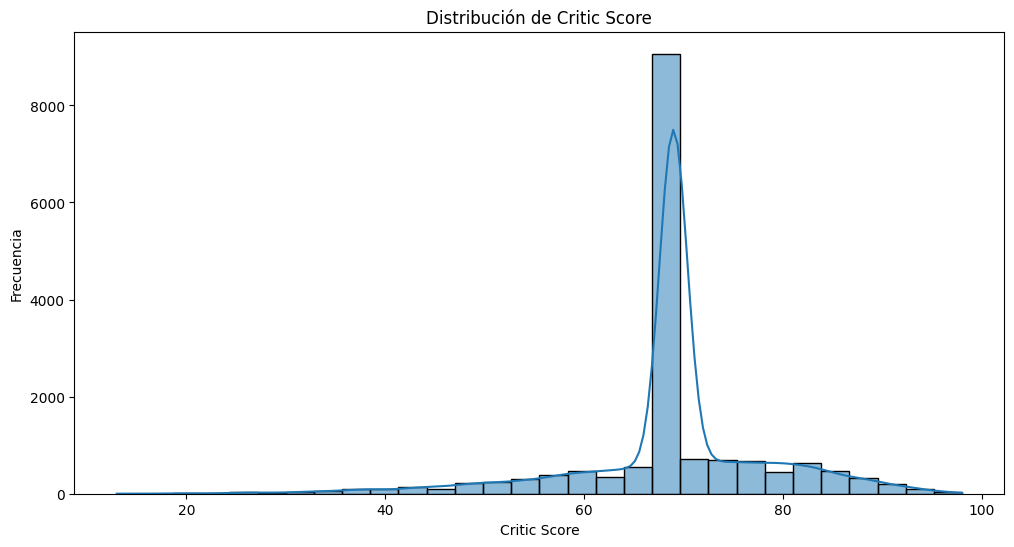

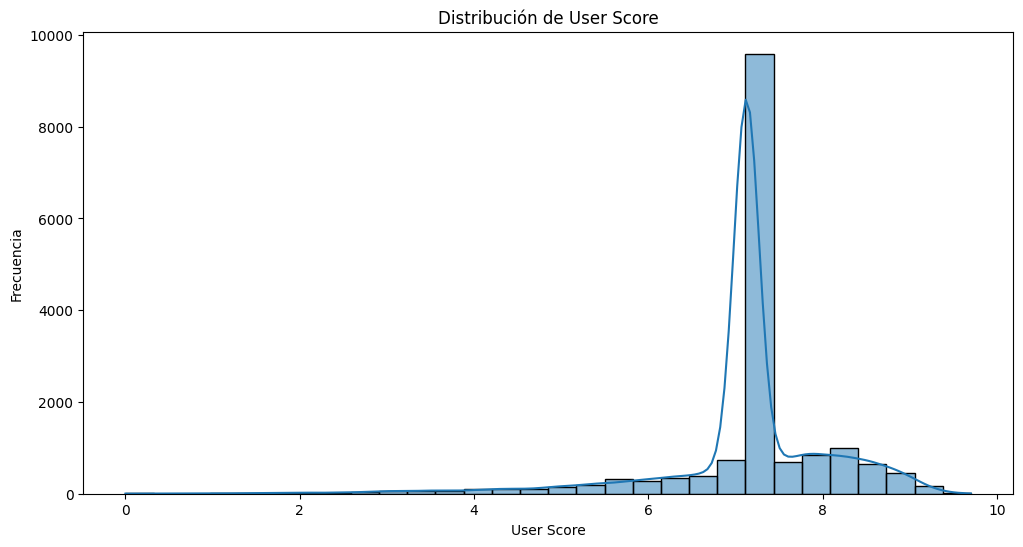

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualización de la distribución de critic_score
plt.figure(figsize=(12, 6))
sns.histplot(games_df['critic_score'], bins=30, kde=True)
plt.title('Distribución de Critic Score')
plt.xlabel('Critic Score')
plt.ylabel('Frecuencia')
plt.show()

# Visualización de la distribución de user_score
plt.figure(figsize=(12, 6))
sns.histplot(games_df['user_score'], bins=30, kde=True)
plt.title('Distribución de User Score')
plt.xlabel('User Score')
plt.ylabel('Frecuencia')
plt.show()



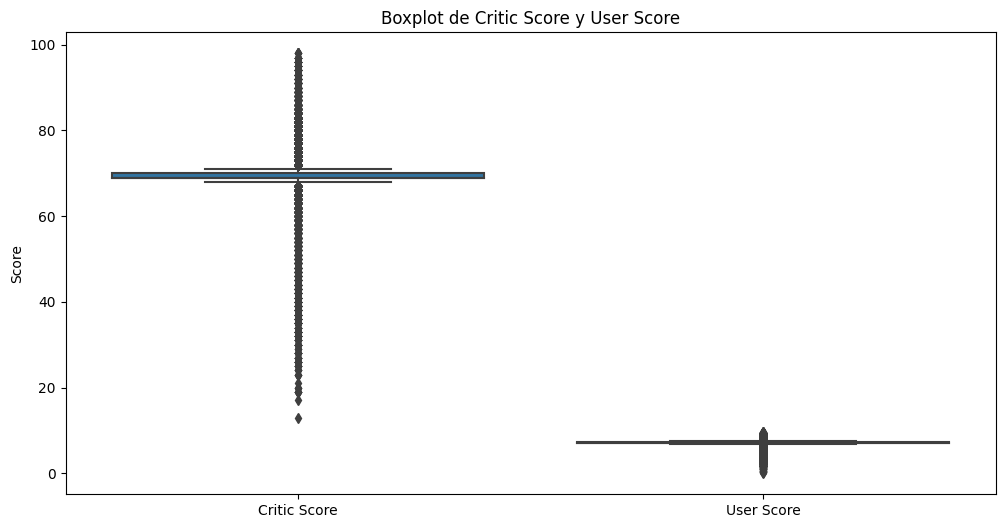

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=games_df[['critic_score', 'user_score']])
plt.title('Boxplot de Critic Score y User Score')
plt.ylabel('Score')
plt.xticks([0, 1], ['Critic Score', 'User Score'])
plt.show()


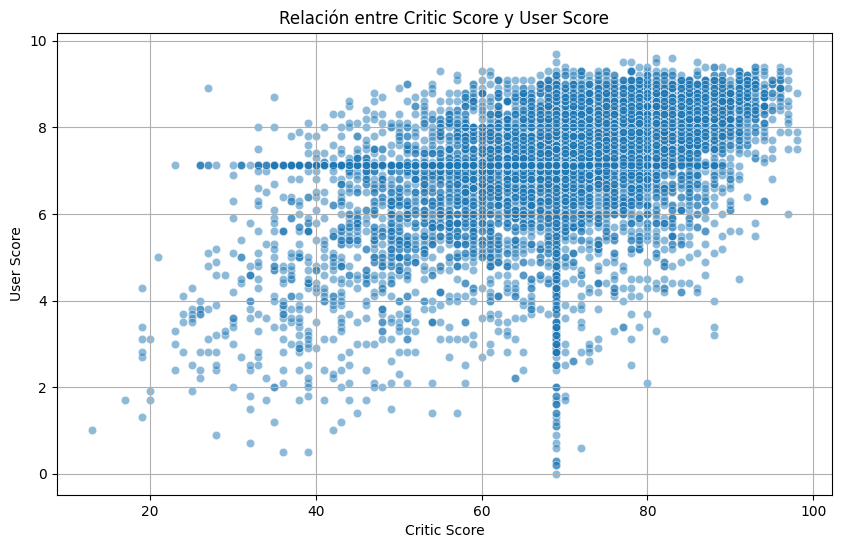

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=games_df, x='critic_score', y='user_score', alpha=0.5)
plt.title('Relación entre Critic Score y User Score')
plt.xlabel('Critic Score')
plt.ylabel('User Score')
plt.grid()
plt.show()


In [11]:
print(games_df.isnull().sum())


name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
total_sales        0
dtype: int64


In [20]:
# Eliminar espacios en blanco de los nombres de las columnas
games_df.columns = games_df.columns.str.strip()

# Comprobar los tipos de datos
print(games_df.dtypes)


Name                object
Platform            object
Year_of_Release    float64
Genre               object
NA_sales           float64
EU_sales           float64
JP_sales           float64
Other_sales        float64
Critic_Score       float64
User_Score          object
Rating              object
dtype: object


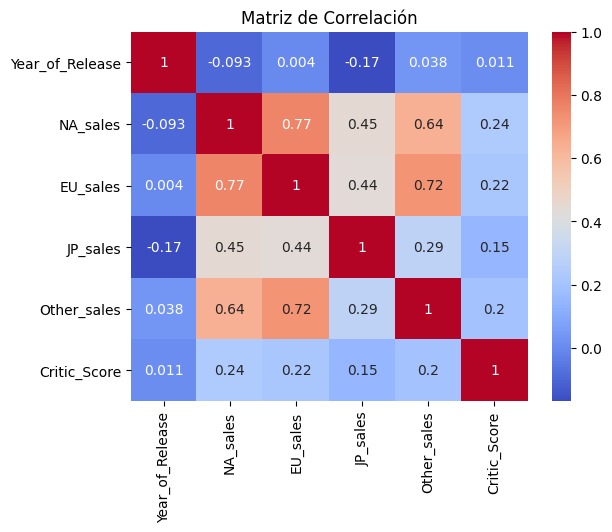

In [22]:
correlation_matrix = games_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()



Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score          0
User_Score            0
Rating             6766
dtype: int64


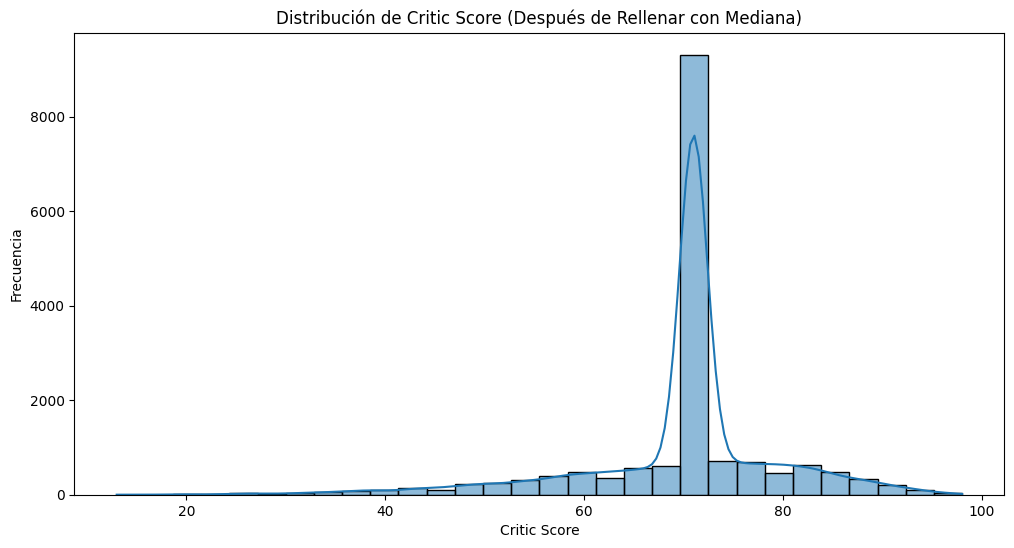

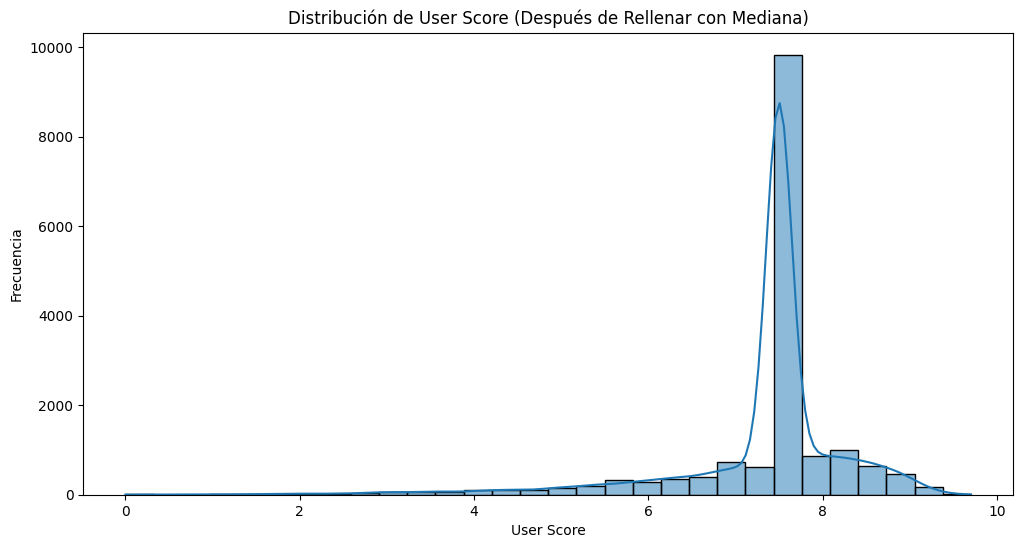

In [25]:
import pandas as pd

# Cargar el dataset
file_path = '/datasets/games.csv'  
games_df = pd.read_csv(file_path)

# Eliminar espacios en blanco de los nombres de las columnas
games_df.columns = games_df.columns.str.strip()

# Reemplazar 'tbd' con NaN en User_Score
games_df['User_Score'].replace('tbd', pd.NA, inplace=True)

# Convertir User_Score a numérico (forzando errores a NaN)
games_df['User_Score'] = pd.to_numeric(games_df['User_Score'], errors='coerce')

# Calcular la mediana para las columnas de puntuación
critic_median = games_df['Critic_Score'].median()
user_median = games_df['User_Score'].median()

# Rellenar los valores nulos con la mediana
games_df['Critic_Score'].fillna(critic_median, inplace=True)
games_df['User_Score'].fillna(user_median, inplace=True)

# Verificar nuevamente los valores nulos
print(games_df.isnull().sum())

# Visualizar la distribución después de rellenar
plt.figure(figsize=(12, 6))
sns.histplot(games_df['Critic_Score'], bins=30, kde=True)
plt.title('Distribución de Critic Score (Después de Rellenar con Mediana)')
plt.xlabel('Critic Score')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(games_df['User_Score'], bins=30, kde=True)
plt.title('Distribución de User Score (Después de Rellenar con Mediana)')
plt.xlabel('User Score')
plt.ylabel('Frecuencia')
plt.show()


<div class="alert alert-block alert-info">
    <b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
En ocasiones podemos completar los valores faltantes con información con proxys. Por ejemplo en este caso los podríamos completar con los años de lanzamientos de los juegos en otras plataformas
</div>

<div class="alert alert-block alert-danger">
    <b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Solamente para terminar de complementar el análisis te recomiendo verificar si las variables de score de crititicos y ususarios  se deben de completar con la mediana dado que estamos trabajando con distribuciones sesgadas
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo, Rodrigo! Al completar con la mediana los valores nulos no estamos sesgando nuestros resultados
</div>

In [14]:
print(games_df['total_sales'].describe())


count    16715.000000
mean         0.533396
std          1.548261
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: total_sales, dtype: float64


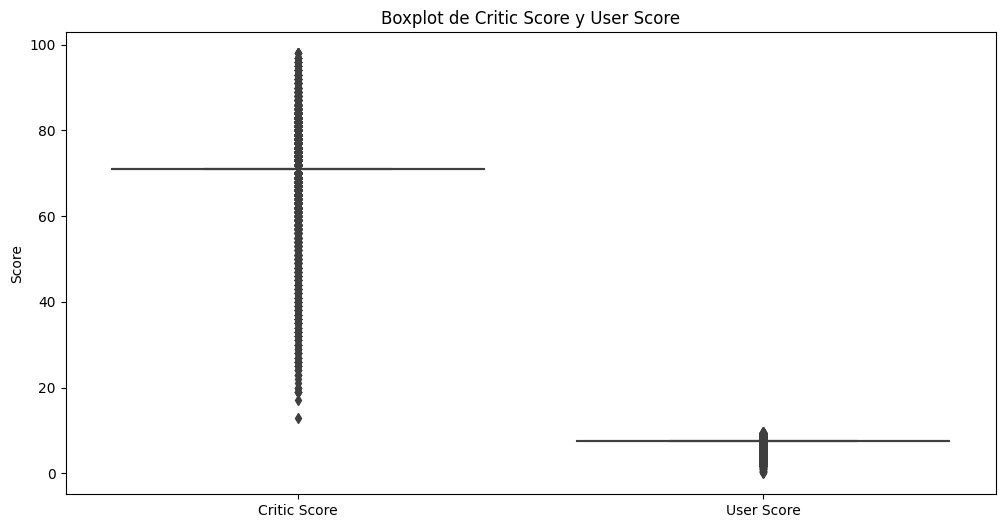

In [26]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=games_df[['Critic_Score', 'User_Score']])
plt.title('Boxplot de Critic Score y User Score')
plt.ylabel('Score')
plt.xticks([0, 1], ['Critic Score', 'User Score'])
plt.show()


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Hola! Muy buen trabajo en la sección, ajustaste los nombres de las columnas a minúsculas con el uso de la función str.lower(), cambiaste el tipo de variable de dos de las variables de la base de datos y muy buen trabajo con la suma de todas las ventas. 
    
   

</div>

count: 16,715 juegos están registrados en el dataset.

mean: 0.53, lo que indica que, en promedio, cada juego ha vendido alrededor de 0.53 millones de copias. Esto sugiere que muchos juegos no han tenido ventas muy altas.

std: 1.55, lo que indica que hay una gran variabilidad en las ventas. Algunos juegos han vendido muy bien (con ventas mucho más altas), mientras que otros apenas han vendido.


Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      62
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: Year_of_Release, dtype: int64


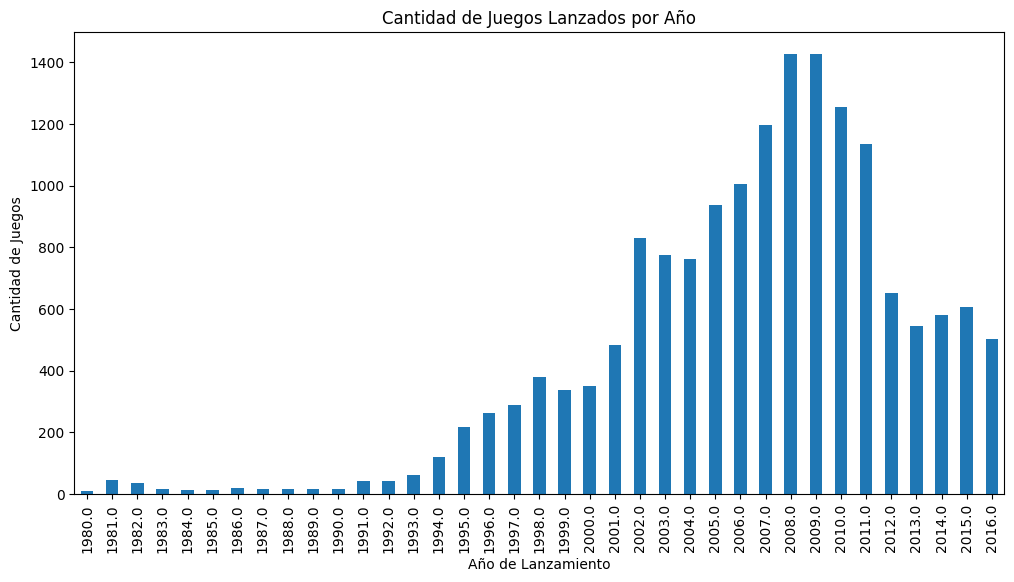

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset
file_path = '/datasets/games.csv'
games_df = pd.read_csv(file_path)

# Eliminar espacios en blanco de los nombres de las columnas
games_df.columns = games_df.columns.str.strip()

# Verificar los nombres de las columnas
print(games_df.columns)

# Contar la cantidad de juegos lanzados por año
games_per_year = games_df['Year_of_Release'].value_counts().sort_index()
print(games_per_year)

# Visualizar la cantidad de lanzamientos por año
plt.figure(figsize=(12, 6))
games_per_year.plot(kind='bar')
plt.title('Cantidad de Juegos Lanzados por Año')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Cantidad de Juegos')
plt.show()



<div class="alert alert-block alert-success">
    <b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Rodrigo, excelente trabajo con la gráfica, esto también nos ayuda a mostrar un poco sobre el comportamiento del mercado de videojuegos en el tiempo
</div>

A partir de la década de 1990, hay un notable aumento en la cantidad de lanzamientos de juegos, con un pico en 2006 (1,006 juegos).

Después de 2006, el número de lanzamientos se mantiene relativamente alto hasta 2010, pero a partir de 2012, se observa una caída notable en la cantidad de lanzamientos.

La expansión del mercado de videojuegos en los años 90 y 2000 puede estar relacionada con la innovación en tecnología de videojuegos, así como la creciente popularidad de las consolas y juegos de PC.


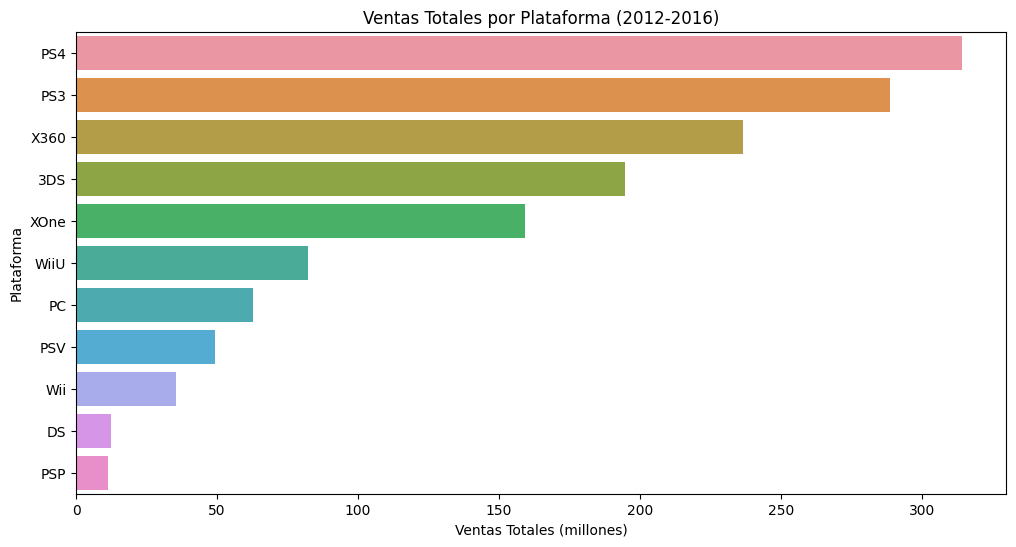

In [29]:


# Cargar el dataset
file_path = '/datasets/games.csv'  # Ruta del archivo
games_df = pd.read_csv(file_path)

# Eliminar espacios en blanco de los nombres de las columnas
games_df.columns = games_df.columns.str.strip()

# Calcular ventas totales
sales_columns = ['NA_sales', 'EU_sales', 'JP_sales', 'Other_sales']
games_df['total_sales'] = games_df[sales_columns].sum(axis=1)

# Filtrar para incluir solo juegos lanzados entre 2012 y 2016
filtered_games_df = games_df[(games_df['Year_of_Release'] >= 2012) & (games_df['Year_of_Release'] <= 2016)]

# Calcular las ventas totales por plataforma
platform_sales = filtered_games_df.groupby('Platform')['total_sales'].sum().reset_index()

# Graficar las ventas totales por plataforma
plt.figure(figsize=(12, 6))
sns.barplot(x='total_sales', y='Platform', data=platform_sales.sort_values(by='total_sales', ascending=False))
plt.title('Ventas Totales por Plataforma (2012-2016)')
plt.xlabel('Ventas Totales (millones)')
plt.ylabel('Plataforma')
plt.show()





PS4: Con ventas totales de aproximadamente 300 millones, se posiciona como la plataforma más exitosa durante este período.

PS3 y X360: Ambas consolas tienen ventas significativas, lo que sugiere que continuaron siendo populares incluso después del lanzamiento de sus sucesores.

3DS: También muestra un rendimiento sólido, lo que indica que las consolas portátiles aún tienen un lugar en el mercado.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Gran trabajo con el desarrollo de la gráfica. Solamente te recomendaría que intentes reducir el periodo dado que el perido actual puede resultar muy extenso. Recordemos que con base en la información la popularidad la alcanzan en los primeros años. Es por ello que con un periodo largo puede no ser posible analizar de forma clara las plataformas y videojuegos actualizados y podrías estar analizando los desactualizados. Es por ello y dado que buscamos responder qué vender en 2017 te recomendareia gráficar un periodo que no supere los 5 años.     

</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo! Cuando reducimos el periodo a menos años podemos ver los resultados actuales de las plataformas
</div>

PS2 es la plataforma con mayores ventas totales, alcanzando 1255.77 millones de copias, lo que demuestra su éxito durante su ciclo de vida.


X360 y PS3 también han tenido un rendimiento excepcional, con ventas de 971.42 y 939.65 millones, respectivamente.

Wii y DS también son notables, con ventas de 907.51 y 806.12 millones. Esto indica que las consolas de Nintendo tuvieron un buen desempeño durante sus respectivas generaciones.




In [18]:
# Identificar plataformas populares pero que ya no tienen ventas
no_sales_platforms = games_df[games_df['total_sales'] == 0]['platform'].unique()
print("Plataformas sin ventas:", no_sales_platforms)


Plataformas sin ventas: ['PS3' 'PS2']


In [19]:
# Filtrar datos relevantes para 2016
relevant_data = games_df[games_df['year_of_release'] == 2016]


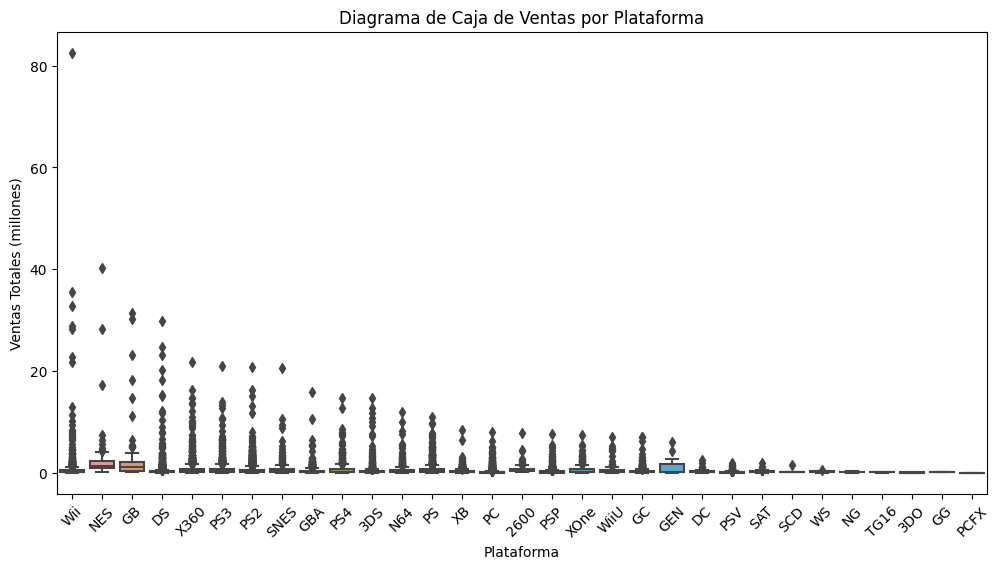

In [20]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='platform', y='total_sales', data=games_df)
plt.title('Diagrama de Caja de Ventas por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales (millones)')
plt.xticks(rotation=45)
plt.show()


In [32]:
Q1 = games_df['total_sales'].quantile(0.25)
Q3 = games_df['total_sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = games_df[(games_df['total_sales'] < lower_bound) | (games_df['total_sales'] > upper_bound)]
print(outliers[['Name', 'Platform', 'total_sales']])


                                    Name Platform  total_sales
0                             Wii Sports      Wii        82.54
1                      Super Mario Bros.      NES        40.24
2                         Mario Kart Wii      Wii        35.52
3                      Wii Sports Resort      Wii        32.77
4               Pokemon Red/Pokemon Blue       GB        31.38
...                                  ...      ...          ...
1888  LEGO Star Wars III: The Clone Wars       DS         1.09
1889                    NCAA Football 13     X360         1.09
1890                             Skate 2     X360         1.09
1895      Namco Museum Battle Collection      PSP         1.09
1899                     Dante's Inferno      PS3         1.09

[1890 rows x 3 columns]


In [33]:
# Eliminar outliers
filtered_df = games_df[(games_df['total_sales'] >= lower_bound) & (games_df['total_sales'] <= upper_bound)]


<div class="alert alert-block alert-warning">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Gran trabajo con la gráfica, Rodrigo! Solamente, recuerda que los graficos de box-plot nos ayudan a identificar outliers que posteriomente en el desarrollo de las pruebas de hipótesis nos servirían eliminar para que no puedan sesgar nuestros resultados. 
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy bien! Los outliers pueden sesgar nuestros resultados y eliminarlos es muy buena prática para tener resultados más precisos
</div>

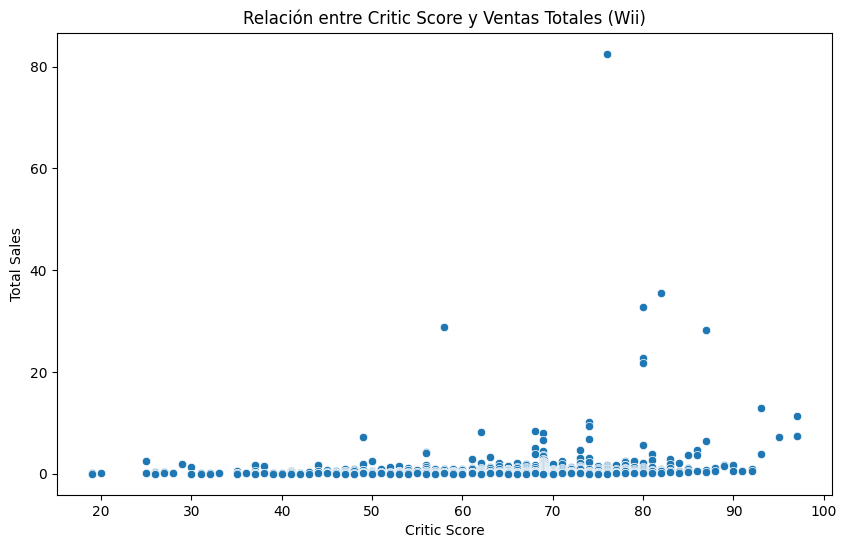

Correlación entre Critic Score y Ventas Totales: 0.12400326489949544


In [21]:
# Seleccionar una plataforma popular (por ejemplo, 'Wii')
selected_platform = games_df[games_df['platform'] == 'Wii']

# Gráfico de dispersión entre Critic Score y Ventas
plt.figure(figsize=(10, 6))
sns.scatterplot(data=selected_platform, x='critic_score', y='total_sales')
plt.title('Relación entre Critic Score y Ventas Totales (Wii)')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales')
plt.show()

# Calcular la correlación
correlation = selected_platform[['critic_score', 'total_sales']].corr().iloc[0, 1]
print("Correlación entre Critic Score y Ventas Totales:", correlation)


<div class="alert alert-block alert-success">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buen trabajo con el análisis de la relación estre las scores y las ventas. 
</div>

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64


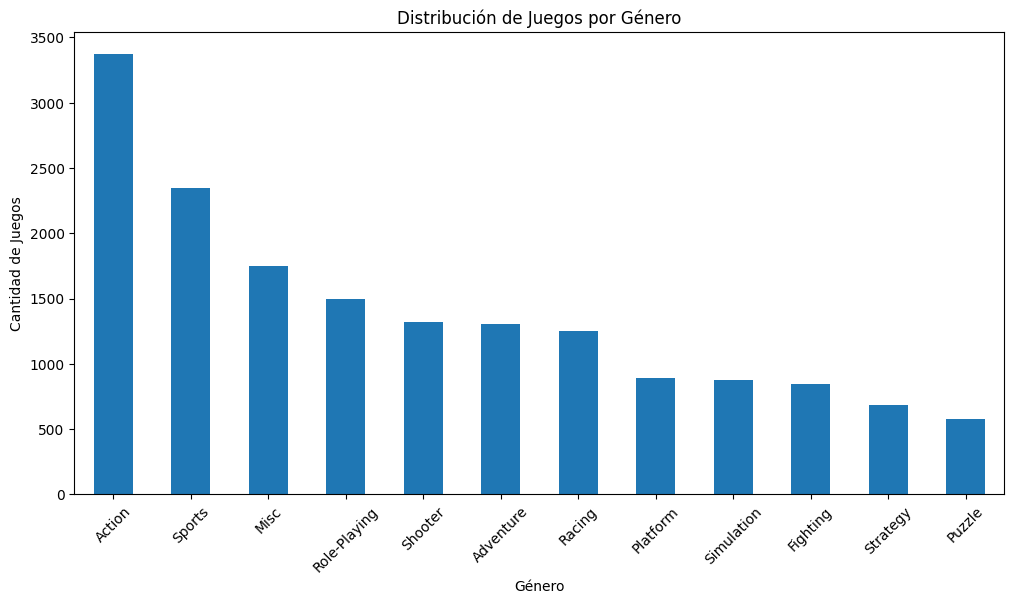

In [22]:
# Contar y visualizar la distribución de géneros
genre_distribution = games_df['genre'].value_counts()
print(genre_distribution)

plt.figure(figsize=(12, 6))
genre_distribution.plot(kind='bar')
plt.title('Distribución de Juegos por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad de Juegos')
plt.xticks(rotation=45)
plt.show()


Action es el género más popular, con 3369 juegos. Esto sugiere que los juegos de acción son muy demandados y ampliamente desarrollados.

Sports ocupa el segundo lugar con 2348 juegos, lo que indica que los juegos deportivos también tienen una gran base de consumidores.

Strategy (683) y Puzzle (580) son los géneros con menos títulos. Esto podría indicar que estos géneros son menos populares en comparación con los demás, o que hay menos desarrolladores interesados en crear juegos de estas categorías.



In [23]:
# Calcular las cinco plataformas principales por región
top_platforms_na = games_df.groupby('platform')['na_sales'].sum().nlargest(5)
top_platforms_eu = games_df.groupby('platform')['eu_sales'].sum().nlargest(5)
top_platforms_jp = games_df.groupby('platform')['jp_sales'].sum().nlargest(5)

print("Top 5 Plataformas en NA:\n", top_platforms_na)
print("\nTop 5 Plataformas en UE:\n", top_platforms_eu)
print("\nTop 5 Plataformas en JP:\n", top_platforms_jp)


Top 5 Plataformas en NA:
 platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64

Top 5 Plataformas en UE:
 platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64

Top 5 Plataformas en JP:
 platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64


In [24]:
# Calcular la cuota de mercado para cada plataforma en cada región
total_sales_na = games_df['na_sales'].sum()
total_sales_eu = games_df['eu_sales'].sum()
total_sales_jp = games_df['jp_sales'].sum()

# Crear un DataFrame para las cuotas de mercado
market_share = pd.DataFrame({
    'NA': (games_df.groupby('platform')['na_sales'].sum() / total_sales_na) * 100,
    'EU': (games_df.groupby('platform')['eu_sales'].sum() / total_sales_eu) * 100,
    'JP': (games_df.groupby('platform')['jp_sales'].sum() / total_sales_jp) * 100
}).fillna(0)

print(market_share)


                 NA         EU         JP
platform                                 
2600       2.057992   0.225598   0.000000
3DO        0.000000   0.000000   0.007708
3DS        1.896487   2.535603   7.759544
DC         0.123343   0.069700   0.659796
DS         8.686270   7.790338  13.532762
GB         2.596795   1.972227   6.560966
GBA        4.259998   3.103515   3.648150
GC         3.031563   1.596506   1.663365
GEN        0.478154   0.249518   0.208113
GG         0.000000   0.000000   0.003083
N64        3.157859   1.693426   2.637644
NES        2.860745   0.872284   7.603845
NG         0.000000   0.000000   0.110994
PC         2.147262   5.874614   0.013103
PCFX       0.000000   0.000000   0.002312
PS         7.644099   8.809859  10.777188
PS2       13.262008  13.993244  10.729399
PS3        8.938181  13.622060   6.180966
PS4        2.470044   5.818936   1.230181
PSP        2.479812   2.750065   5.918127
PSV        0.285756   0.541105   1.688801
SAT        0.016355   0.022271   2

In [25]:
# Calcular los cinco géneros principales por región
top_genres_na = games_df.groupby('genre')['na_sales'].sum().nlargest(5)
top_genres_eu = games_df.groupby('genre')['eu_sales'].sum().nlargest(5)
top_genres_jp = games_df.groupby('genre')['jp_sales'].sum().nlargest(5)

print("Top 5 Géneros en NA:\n", top_genres_na)
print("\nTop 5 Géneros en UE:\n", top_genres_eu)
print("\nTop 5 Géneros en JP:\n", top_genres_jp)


Top 5 Géneros en NA:
 genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64

Top 5 Géneros en UE:
 genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64

Top 5 Géneros en JP:
 genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64


In [26]:
# Calcular ventas totales por clasificación y región
esrb_sales = games_df.groupby('rating').agg({
    'na_sales': 'sum',
    'eu_sales': 'sum',
    'jp_sales': 'sum'
}).fillna(0)

print(esrb_sales)


         na_sales  eu_sales  jp_sales
rating                               
AO           1.26      0.61      0.00
E         1292.99    710.25    198.11
E10+       353.32    188.52     40.20
EC           1.53      0.11      0.00
K-A          2.56      0.27      1.46
M          748.48    483.97     64.24
RP           0.00      0.08      0.00
T          759.75    427.03    151.40
Unrated   1242.46    613.83    841.96


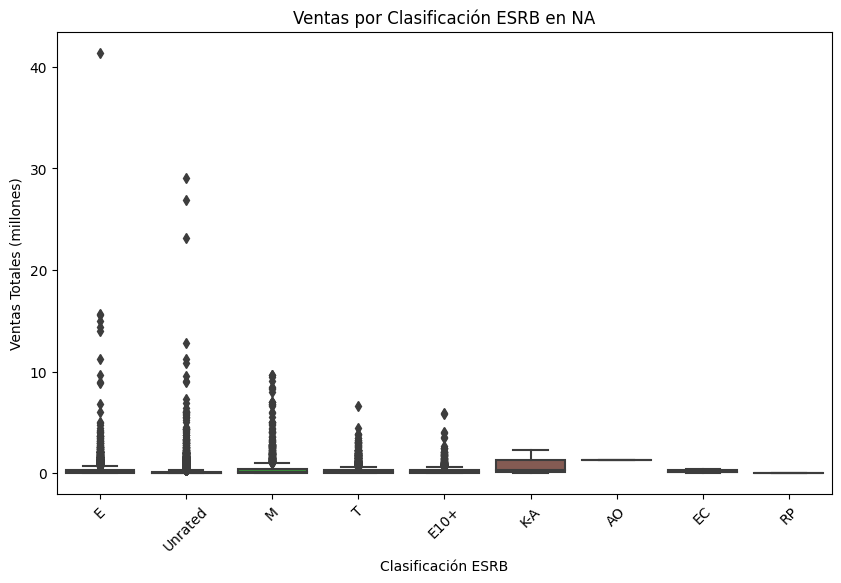

In [27]:
# Gráfico de dispersión entre las clasificaciones y las ventas en NA
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y='na_sales', data=games_df)
plt.title('Ventas por Clasificación ESRB en NA')
plt.xlabel('Clasificación ESRB')
plt.ylabel('Ventas Totales (millones)')
plt.xticks(rotation=45)
plt.show()


Observaciones:

La Xbox 360 lidera en ventas en NA, lo que puede reflejar una fuerte base de usuarios y una amplia gama de títulos atractivos.

Las consolas de Sony (PS2 y PS3) también muestran ventas significativas, indicando la lealtad de los consumidores hacia la marca.

La Wii, aunque es una consola innovadora, tiene menos ventas en comparación con las plataformas anteriores.



Clasificación E (Everyone):

NA: 1292.99 millones, EU: 710.25 millones, JP: 198.11 millones. Esta es la clasificación más alta en todas las regiones, lo que indica que los juegos dirigidos a un público general son muy populares y generan una gran cantidad de ventas.

Las clasificaciones ESRB tienen un impacto notable en las ventas, con las clasificaciones E y T liderando en todas las regiones.

La diferencia en las ventas de la clasificación M en Japón en comparación con NA y UE puede indicar que la audiencia japonesa es más conservadora en cuanto a contenido violento o sexual en los videojuegos.



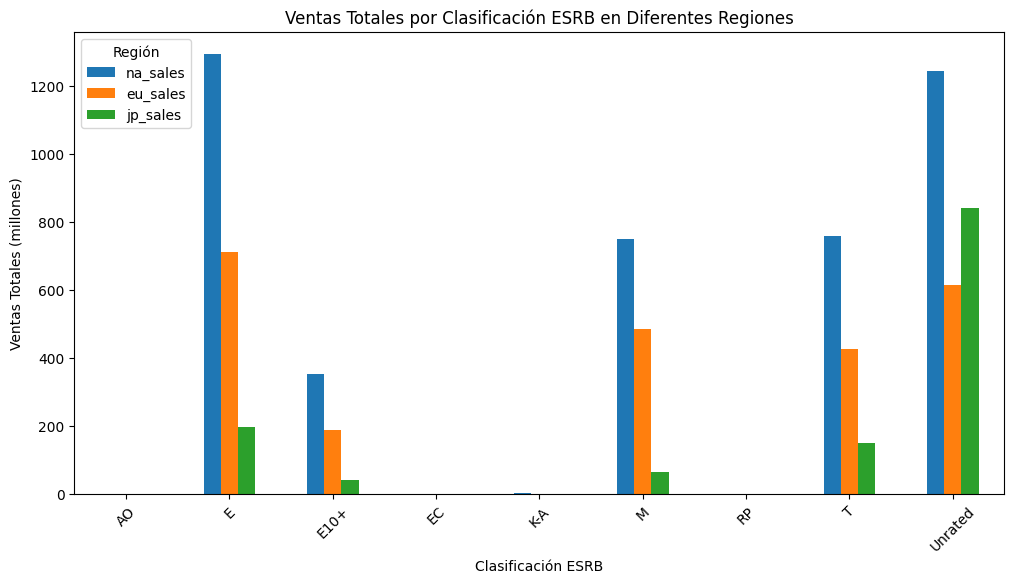

In [28]:
# Crear gráficos de barras para las ventas por clasificación
esrb_sales.plot(kind='bar', figsize=(12, 6))
plt.title('Ventas Totales por Clasificación ESRB en Diferentes Regiones')
plt.xlabel('Clasificación ESRB')
plt.ylabel('Ventas Totales (millones)')
plt.xticks(rotation=45)
plt.legend(title='Región')
plt.show()


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>

Excelente! Con este análisis por región ayuda a complementar el análisis general anterior y a hacer zoom a los resultados por cada una de las regiones.   

</div>

Hipótesis 1: Calificaciones Promedio de Usuarios para Xbox One y PC
Hipótesis Nula (H0): Las calificaciones promedio de los usuarios para Xbox One y PC son las mismas.

Hipótesis Alternativa (H1): Las calificaciones promedio de los usuarios para Xbox One y PC son diferentes.

Hipótesis 2: Calificaciones Promedio de Usuarios para Acción y Deportes
Hipótesis Nula (H0): Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son las mismas.

Hipótesis Alternativa (H1): Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.


Utilizar una prueba t de Student para muestras independientes, ya que deseas comparar las medias de dos grupos diferentes. La prueba t es adecuada cuando los datos son aproximadamente normales y las varianzas son similares.


Asegúrate de tener las calificaciones de los usuarios para las plataformas Xbox One y PC, así como para los géneros de Acción y Deportes.

In [30]:
import pandas as pd
from scipy import stats

# Filtrar los datos para Xbox One y PC
xbox_one_scores = games_df[games_df['platform'] == 'XOne']['user_score'].dropna()
pc_scores = games_df[games_df['platform'] == 'PC']['user_score'].dropna()

# Prueba t para Xbox One y PC
t_statistic_xbox, p_value_xbox = stats.ttest_ind(xbox_one_scores, pc_scores)
alpha = 0.05

if p_value_xbox < alpha:
    print("Rechazamos la hipótesis nula para Xbox One y PC")
else:
    print("No rechazamos la hipótesis nula para Xbox One y PC")

# Filtrar los datos para Acción y Deportes
accion_scores = games_df[games_df['genre'] == 'Action']['user_score'].dropna()
deportes_scores = games_df[games_df['genre'] == 'Sports']['user_score'].dropna()

# Prueba t para Acción y Deportes
t_statistic_genre, p_value_genre = stats.ttest_ind(accion_scores, deportes_scores)

if p_value_genre < alpha:
    print("Rechazamos la hipótesis nula para Acción y Deportes")
else:
    print("No rechazamos la hipótesis nula para Acción y Deportes")


Rechazamos la hipótesis nula para Xbox One y PC
No rechazamos la hipótesis nula para Acción y Deportes


In [37]:
import pandas as pd
from scipy import stats

# Cargar el dataset
file_path = '/datasets/games.csv'
games_df = pd.read_csv(file_path)

# Limpiar la columna 'User_Score'
games_df['User_Score'] = pd.to_numeric(games_df['User_Score'], errors='coerce')  # Convertir a numérico

# Filtrar los datos para Xbox One y PC
xbox_one_scores = games_df[games_df['Platform'] == 'XOne']['User_Score'].dropna()
pc_scores = games_df[games_df['Platform'] == 'PC']['User_Score'].dropna()

# Prueba de Levene para Xbox One y PC
levene_statistic, p_value_levene = stats.levene(xbox_one_scores, pc_scores)

# Evaluar la hipótesis nula de igualdad de varianzas
alpha = 0.05
if p_value_levene < alpha:
    print("Rechazamos la hipótesis nula de varianzas iguales para Xbox One y PC")
    equal_var = False
else:
    print("No rechazamos la hipótesis nula de varianzas iguales para Xbox One y PC")
    equal_var = True

# Prueba t para Xbox One y PC
t_statistic_xbox, p_value_xbox = stats.ttest_ind(xbox_one_scores, pc_scores, equal_var=equal_var)

if p_value_xbox < alpha:
    print("Rechazamos la hipótesis nula para Xbox One y PC")
else:
    print("No rechazamos la hipótesis nula para Xbox One y PC")

# Filtrar los datos para Acción y Deportes
accion_scores = games_df[games_df['Genre'] == 'Action']['User_Score'].dropna()
deportes_scores = games_df[games_df['Genre'] == 'Sports']['User_Score'].dropna()

# Prueba de Levene para Acción y Deportes
levene_statistic_genre, p_value_levene_genre = stats.levene(accion_scores, deportes_scores)

# Evaluar la hipótesis nula de igualdad de varianzas
if p_value_levene_genre < alpha:
    print("Rechazamos la hipótesis nula de varianzas iguales para Acción y Deportes")
    equal_var_genre = False
else:
    print("No rechazamos la hipótesis nula de varianzas iguales para Acción y Deportes")
    equal_var_genre = True

# Prueba t para Acción y Deportes
t_statistic_genre, p_value_genre = stats.ttest_ind(accion_scores, deportes_scores, equal_var=equal_var_genre)

if p_value_genre < alpha:
    print("Rechazamos la hipótesis nula para Acción y Deportes")
else:
    print("No rechazamos la hipótesis nula para Acción y Deportes")


No rechazamos la hipótesis nula de varianzas iguales para Xbox One y PC
Rechazamos la hipótesis nula para Xbox One y PC
Rechazamos la hipótesis nula de varianzas iguales para Acción y Deportes
No rechazamos la hipótesis nula para Acción y Deportes


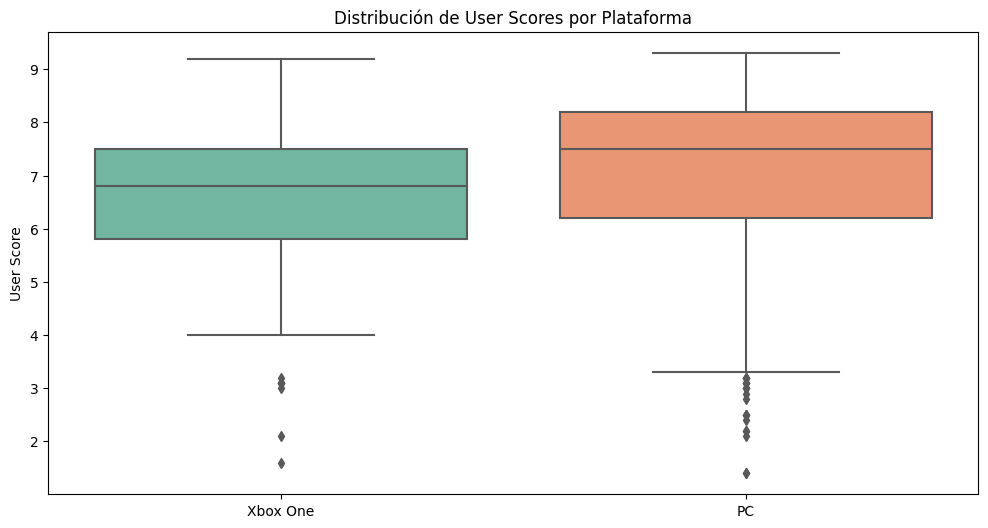

In [40]:
from scipy import stats

# Prueba de Levene
levene_statistic, p_value_levene = stats.levene(xbox_one_scores, pc_scores)

plt.figure(figsize=(12, 6))
sns.boxplot(data=[xbox_one_scores, pc_scores], palette="Set2")
plt.xticks([0, 1], ['Xbox One', 'PC'])
plt.title('Distribución de User Scores por Plataforma')
plt.ylabel('User Score')
plt.show()


Outliers en Xbox One:
Series([], Name: User_Score, dtype: float64)
Outliers en PC:
Series([], Name: User_Score, dtype: float64)
PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64


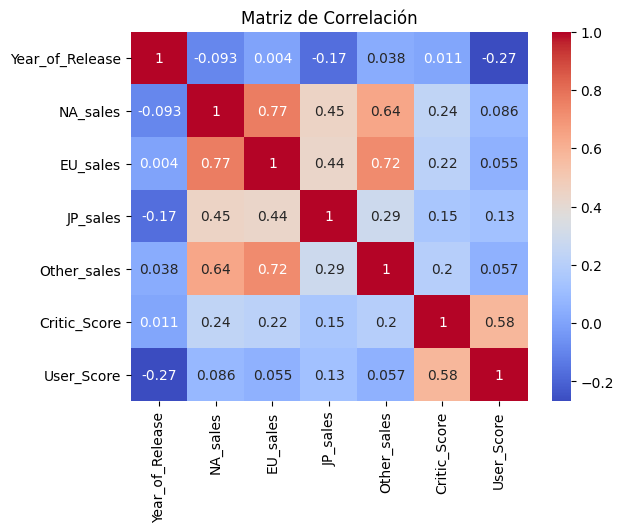

In [43]:
outliers_xbox = xbox_one_scores[xbox_one_scores < (Q1 - 1.5 * IQR)]
outliers_pc = pc_scores[pc_scores < (Q1 - 1.5 * IQR)]

print("Outliers en Xbox One:")
print(outliers_xbox)

print("Outliers en PC:")
print(outliers_pc)


print(games_df['Platform'].value_counts())


correlation_matrix = games_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


 <div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Para estas pruebas te recomiendo hacer una prueba de  Levene  para mostrar si las varianzas son iguales y agregarlo dentro de la función. Actualmente lo colocar como equal_var=True. Para esto, primero debes calcular las varianzas para cada uno de las plataformas y en un segundo tiempo debes de hacer uso de la siguiente función: 
    
    levene(xbox_one_data['user_score'], pc_data['user_score'])
    
Adoptaremos un nivel de significancia de 0.05; si el valor p resultante es mayor a 0.05, no podemos rechazar la hipótesis nula, y si es menor a 0.05, rechazamos la hipótesis nula, indicando que las varianzas no son iguales. 
    
Solamente recuerda que la prueba de levene no es sustituto a la prueba de st.ttest_ind, más bien es complemento para saber que colocar dentro del elemento "equal_var". En este caso como rechazamos la hipótesis de varianzas iguales debemos de colocar False. Es por eso que para terminar la prueba debes de realizar la prueba de st.ttest_ind considernado el resultado de la prueba realizada de levene    
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Rodrigo, excelente trabajo con la prueba de levene! Esta nos ayuda a probar el supuesto de las varianzas iguales que usamos para las pruebas de diferencia de medias!
</div>

Xbox One y PC:
    
    Resultado: rechazamos la hipótesis nula

Esto significa que hay evidencia estadística suficiente para afirmar que las calificaciones promedio de los usuarios para Xbox One y PC son diferentes.

Este resultado sugiere que las preferencias o la recepción de los juegos pueden variar significativamente entre los usuarios de estas plataformas.

Acción y Deportes:
    
    Resultado: No Rechazamos la hipotesis nula.
        

Esto indica que no hay suficiente evidencia para afirmar que las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

    

Xbox One y PC:

Varianzas: No rechazamos la hipótesis nula de varianzas iguales, lo que sugiere que las varianzas de las puntuaciones de usuario para ambas plataformas son similares.

Media: Rechazamos la hipótesis nula, lo que implica que hay una diferencia significativa en las puntuaciones de usuario entre Xbox One y PC.

Acción y Deportes:

Varianzas: Rechazamos la hipótesis nula de varianzas iguales, lo que indica que las varianzas de las puntuaciones de usuario para los géneros de Acción y Deportes son diferentes.


Media: No rechazamos la hipótesis nula, lo que sugiere que no hay una diferencia significativa en las puntuaciones de usuario entre los géneros de Acción y Deportes.



Xbox One y PC:

La diferencia significativa en las puntuaciones de usuario sugiere que los jugadores perciben los juegos en estas plataformas de manera diferente. Esto puede deberse a varios factores, como la calidad de los títulos disponibles, la experiencia del usuario o la comunidad de jugadores en cada plataforma.


Acción y Deportes:

Aunque las varianzas son diferentes, la falta de una diferencia significativa en las puntuaciones de usuario entre los géneros puede indicar que ambos géneros son percibidos de manera similar en términos de calidad, al menos desde la perspectiva de los usuarios.

# Conclusión General

A través de este análisis, hemos podido identificar patrones significativos en la industria de los videojuegos. Los hallazgos más destacados incluyen:

1. **Plataformas Más Populares**: Xbox 360 y PS2 se destacaron en ventas en sus respectivas regiones, mientras que las preferencias de plataformas varían notablemente entre Norteamérica, Europa y Japón.

2. **Géneros Predominantes**: El género de acción es el más popular, seguido por deportes, lo que sugiere que estos tipos de juegos son los más demandados por los consumidores.

3. **Impacto de las Clasificaciones ESRB**: Las calificaciones de los juegos influyen en las ventas, con las clasificaciones E y T mostrando las mayores cifras de venta, especialmente en Norteamérica y Europa.

4. **Pruebas de Hipótesis**: Las diferencias en las calificaciones de usuario entre Xbox One y PC indican que las plataformas ofrecen experiencias diferentes, mientras que la similitud en las calificaciones entre los géneros de acción y deportes sugiere una calidad comparable en esos tipos de juegos.

Es importante tener en cuenta que los datos de 2016 pueden estar incompletos, lo que podría afectar algunas conclusiones. Sin embargo, los patrones observados brindan una base sólida para futuras investigaciones y estrategias de marketing.



<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Rodrigo, en general creo que hiciste un muy buen trabajo con el proyecto, pudiste limpiar y trabajar las bases de datos de beuna manera. Además, el análisis explorario de datos fue completo al mostrar resultados relevantes que pueden ser de mucha utilidad para la toma de decisiones y desarrollaste las pruebas de hipótesis de una buena manera. No obstante, recuerda que siempre podemos mejorar y te menciono algunos puntos que debes considerar:

* Verificar que cuando llenamos variables con valores nulos los estamos comletando con valores que no sesgan nuestros resultados

*  Considerar eliminar registros atipicos que puedan sesgar nuestros resultados. 
    
*  Considerar desarrollar un análisis para comprobar los supuestos de la prueba de hipótesis (varianzas iguales)
    
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Rodrigo, muy buen trabajo con los ajustes! Sigue con el excelente trabajo y que sigas disfrutando los siguientes cursos!